<a href="https://colab.research.google.com/github/zeroXjoex/FinalProjectDA0xjoex---Capstone/blob/main/Final_Project_070823DA50GC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  1.2 Objectives of the study

##### The primary objectives of this study are as follows:

- To explore the experiences of individuals in using data analytics techniques to enhance their brand recognition on social media.
- To understand the impact of data analytics techniques on the social media presence of individuals and their brand recognition.
- To identify the most effective data analytics techniques used by individuals to improve their brand recognition on social media.
- To provide recommendations for businesses on how to effectively utilize data analytics techniques to improve their brand recognition on social media.

### Scraping the Dataset

In [ ]:
#pip install beautifulsoup4

In [ ]:
#pip install requests

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
import time

#def scrape_amazon_Electronics_reviews():
    url = "https://www.amazon.com/s?k=Electronics"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}

    response = requests.get(url, headers=headers)

    #if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        product_links = []

        #for product in soup.find_all("div", class_="sg-col-inner"):
            link = product.find("a", class_="a-link-normal")
            #if link:
                product_links.append("https://www.amazon.com" + link['href'])

        #with open("Electronics_reviews.csv", "w", newline="", encoding="utf-8") as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(["Rating", "Comment"])

            #for link in product_links:
                response = requests.get(link, headers=headers)
                #if response.status_code == 200:
                    soup = BeautifulSoup(response.content, "html.parser")
                    product_title = soup.find("span", class_="a-size-large product-title-word-break").text.strip()

                    review_section = soup.find("div", {"data-hook": "reviews-collapsed"})
                    #if review_section:
                        reviews = review_section.find_all("span", {"data-hook": "review-body"})
                        #for review in reviews:
                            rating = review.find_previous("i").text.strip()
                            comment = review.text.strip()  # Get the comment text
                            writer.writerow([rating, comment])

                            # Introduce a delay to avoid overwhelming the server
                            time.sleep(2)
                #else:
                    print(f"Failed to scrape {link}. Status code: {response.status_code}")
                    # Retry the request after waiting for a while
                    time.sleep(10)
    #else:
        print(f"Failed to access the URL. Status code: {response.status_code}")


#if __name__ == "__main__":
    scrape_amazon_Electronics()

The aboce code can be used to scrap data, but amazon and almost all platforms have restricted it, so i got in touch with stanford where they had amazon electronics dataset and they mailed it to me

### Reading Json File

In [ ]:
#import json
#import os


file_path = os.path.expanduser("~/Desktop/Final Project/Electronics.json")

#def stream_json_data(file_path):
    #with open(file_path, "r") as json_file:
        #for line_number, line in enumerate(json_file, start=1):
            #try:
                data = json.loads(line)
                #yield data
            #except json.JSONDecodeError:
                print(f"Error parsing line {line_number}: {line}")

#for index, item in enumerate(stream_json_data(file_path), start=1):
    print(f"Row {index}: {item}")
    #if index == 20:
        #break

### Converting it into Excel File

In [ ]:
#import os
#import json
#import pandas as pd
#from itertools import islice

file_path = os.path.expanduser("~/Desktop/Final Project/Electronics.json")

chunk_size = 1000

json_directory = os.path.dirname(file_path)

output_file_path = os.path.join(json_directory, "Electronics.xlsx")

excel_writer = pd.ExcelWriter(output_file_path, engine="xlsxwriter")

row_counter = 0

#with open(file_path, "r") as json_file:
    #while True:
        data_chunk = list(islice(json_file, chunk_size))
        #if not data_chunk:
            #break

        df_chunk = pd.DataFrame([json.loads(line) for line in data_chunk])

        df_chunk.to_excel(excel_writer, sheet_name="Sheet1", index=False, startrow=row_counter)

        row_counter += len(df_chunk)

excel_writer.save()

#print("Data saved to Excel file:", output_file_path)

### Importing The Dataset

In [14]:
#!pip install gspread oauth2client

In [15]:
#!pip install gdown

In [11]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving Final Project - 070823DA(36).ipynb to Final Project - 070823DA(36) (3).ipynb


In [12]:
uploaded.keys()

dict_keys(['Final Project - 070823DA(36) (3).ipynb'])

In [13]:
from google.colab import files
import pandas as pd

# Upload the Excel file
uploaded = files.upload()

Saving Electronics.xlsx to Electronics (1).xlsx


In [18]:
print("Uploaded files:", uploaded.keys())

Uploaded files: dict_keys(['Electronics (1).xlsx'])


In [21]:
import pandas as pd

# Read the uploaded Excel file using the openpyxl engine
df = pd.read_excel("Electronics (1).xlsx", engine='openpyxl')

# Display the first few rows of the DataFrame
print(df.head())

  overall verified   reviewTime      reviewerID        asin  \
0       5     True  07 17, 2002  A1N070NS9CJQ2I  0060009810   
1       5    False   07 6, 2002  A3P0KRKOBQK1KN  0060009810   
2       5    False   07 3, 2002  A192HO2ICJ75VU  0060009810   
3       4    False  06 30, 2002  A2T278FKFL3BLT  0060009810   
4       5    False  06 28, 2002  A2ZUXVTW8RXBXW  0060009810   

                       style reviewerName  \
0  {'Format:': ' Hardcover'}   Teri Adams   
1  {'Format:': ' Hardcover'}     Willa C.   
2  {'Format:': ' Hardcover'}          Kit   
3  {'Format:': ' Hardcover'}       Andres   
4  {'Format:': ' Hardcover'}         John   

                                          reviewText  \
0  This was the first time I read Garcia-Aguilera...   
1  As with all of Ms. Garcia-Aguilera's books, I ...   
2  I've not read any of Ms Aguilera's works befor...   
3  This romance novel is right up there with the ...   
4  Carolina Garcia Aguilera has done it again.  S...   

             

### Basic Info and Statistics

In [23]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (1048575, 12)


In [24]:
print("\nBasic Information:")
print(df.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   overall         1035845 non-null  object
 1   verified        887548 non-null   object
 2   reviewTime      1042266 non-null  object
 3   reviewerID      1048575 non-null  object
 4   asin            1047571 non-null  object
 5   style           902959 non-null   object
 6   reviewerName    1013386 non-null  object
 7   reviewText      1046804 non-null  object
 8   summary         1048484 non-null  object
 9   unixReviewTime  799614 non-null   object
 10  vote            275785 non-null   object
 11  image           72538 non-null    object
dtypes: object(12)
memory usage: 96.0+ MB
None


In [25]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
        overall verified reviewTime reviewerID        asin  \
count   1035845   887548    1042266    1048575     1047571   
unique    39424      977      39728     638976      267167   
top           5     True       True       True  B000BQ7GW8   
freq     598079   596838     161443      42032       13755   

                                           style     reviewerName  reviewText  \
count                                     902959          1013386     1046804   
unique                                    228626           669843      836949   
top     {'Package Type:': ' Standard Packaging'}  Amazon Customer  Five Stars   
freq                                       33969            26733       38232   

           summary unixReviewTime    vote  \
count      1048484         799614  275785   
unique      447538          72620   14412   
top     Five Stars              2       2   
freq         79448          16755   25023   

                                    

In [26]:
df.head(15)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"07 17, 2002",A1N070NS9CJQ2I,0060009810,{'Format:': ' Hardcover'},Teri Adams,This was the first time I read Garcia-Aguilera...,Hit The Spot!,1026864000,NaN,NaN
1,5,False,"07 6, 2002",A3P0KRKOBQK1KN,0060009810,{'Format:': ' Hardcover'},Willa C.,"As with all of Ms. Garcia-Aguilera's books, I ...",one hot summer is HOT HOT HOT!,1025913600,NaN,NaN
2,5,False,"07 3, 2002",A192HO2ICJ75VU,0060009810,{'Format:': ' Hardcover'},Kit,I've not read any of Ms Aguilera's works befor...,One Hot Summer,1025654400,2,NaN
3,4,False,"06 30, 2002",A2T278FKFL3BLT,0060009810,{'Format:': ' Hardcover'},Andres,This romance novel is right up there with the ...,I love this book!,1025395200,3,NaN
4,5,False,"06 28, 2002",A2ZUXVTW8RXBXW,0060009810,{'Format:': ' Hardcover'},John,Carolina Garcia Aguilera has done it again. S...,One Hot Book,1025222400,NaN,NaN
5,4,False,"06 25, 2002",A21JDG4HA6OLPF,0060009810,{'Format:': ' Hardcover'},Mari,"Not only can she write mysteries,but she sure ...",Carolina does it again!,1024963200,2,NaN
6,5,False,"06 22, 2002",A2NCADLQY962YD,0060009810,{'Format:': ' Hardcover'},Amazon Customer,Once again Garcia-Aguilera has written a book ...,"It's no mystery, Garcia-Aguilera can do romance",1024704000,4,NaN
7,5,False,"01 26, 2006",A2UNA438B0FRA8,0060786817,{'Format:': ' Hardcover'},J. Belfield,The timing is just right for a good book. Actu...,A breath of fresh air for reading,1138233600,NaN,NaN
8,5,False,"01 21, 2006",A2NQQSHSQKKGEX,0060786817,{'Format:': ' Hardcover'},E. D. Davis,Engaging. Dark. Reading the book you could alm...,Well written page turner with fully develped c...,1137801600,4,NaN
9,3,False,"01 18, 2006",A5EXND10WD4PM,0060786817,{'Format:': ' Hardcover'},Mocha Girl,Set amid the backdrop of New York City's imper...,The Title Tells The Story!,1137542400,7,NaN


### Dropping the Unnecessary columns

In [27]:
df = df.drop(columns=['reviewerName', 'vote', 'image'])

In [28]:
df.head(10)

,overall,verified,reviewTime,reviewerID,asin,style,reviewText,summary,unixReviewTime
0,5,True,"07 17, 2002",A1N070NS9CJQ2I,0060009810,{'Format:': ' Hardcover'},This was the first time I read Garcia-Aguilera...,Hit The Spot!,1026864000
1,5,False,"07 6, 2002",A3P0KRKOBQK1KN,0060009810,{'Format:': ' Hardcover'},"As with all of Ms. Garcia-Aguilera's books, I ...",one hot summer is HOT HOT HOT!,1025913600
2,5,False,"07 3, 2002",A192HO2ICJ75VU,0060009810,{'Format:': ' Hardcover'},I've not read any of Ms Aguilera's works befor...,One Hot Summer,1025654400
3,4,False,"06 30, 2002",A2T278FKFL3BLT,0060009810,{'Format:': ' Hardcover'},This romance novel is right up there with the ...,I love this book!,1025395200
4,5,False,"06 28, 2002",A2ZUXVTW8RXBXW,0060009810,{'Format:': ' Hardcover'},Carolina Garcia Aguilera has done it again. S...,One Hot Book,1025222400
5,4,False,"06 25, 2002",A21JDG4HA6OLPF,0060009810,{'Format:': ' Hardcover'},"Not only can she write mysteries,but she sure ...",Carolina does it again!,1024963200
6,5,False,"06 22, 2002",A2NCADLQY962YD,0060009810,{'Format:': ' Hardcover'},Once again Garcia-Aguilera has written a book ...,"It's no mystery, Garcia-Aguilera can do romance",1024704000
7,5,False,"01 26, 2006",A2UNA438B0FRA8,0060786817,{'Format:': ' Hardcover'},The timing is just right for a good book. Actu...,A breath of fresh air for reading,1138233600
8,5,False,"01 21, 2006",A2NQQSHSQKKGEX,0060786817,{'Format:': ' Hardcover'},Engaging. Dark. Reading the book you could alm...,Well written page turner with fully develped c...,1137801600
9,3,False,"01 18, 2006",A5EXND10WD4PM,0060786817,{'Format:': ' Hardcover'},Set amid the backdrop of New York City's imper...,The Title Tells The Story!,1137542400


In [29]:
df_review_text = df[['reviewText']]

In [30]:
print(df_review_text.head(15))

                                           reviewText
0   This was the first time I read Garcia-Aguilera...
1   As with all of Ms. Garcia-Aguilera's books, I ...
2   I've not read any of Ms Aguilera's works befor...
3   This romance novel is right up there with the ...
4   Carolina Garcia Aguilera has done it again.  S...
5   Not only can she write mysteries,but she sure ...
6   Once again Garcia-Aguilera has written a book ...
7   The timing is just right for a good book. Actu...
8   Engaging. Dark. Reading the book you could alm...
9   Set amid the backdrop of New York City's imper...
10  A guilty pleasure of a book with characters so...
11  I'd never before read a Lolita Files' book, an...
12  Wow, I was totally blown away by this book.  J...
13  Lolita Files is one of my favorite authors. Sh...
14  This book is...I don't even know what to call ...


In [158]:
pd.set_option('display.max_colwidth', None)
print(df_review_text.head(5))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  reviewText  \
0  This was the first time I read Garcia-Aguilera.  I came upon the name of this book on Live with Regis and Kelly. This book was exactly what I was looking for ... it hit the spot.  I really enjoyed this book because it was well written. Once I started this book it kept me comin

### Preprocessing and Tokenisation

In [165]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [166]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [159]:
df_review_text = df_review_text.dropna(subset=['reviewText'])

In [160]:
df_review_text['reviewText'] = df_review_text['reviewText'].astype(str) #covert to string

In [161]:
df_review_text = df_review_text.applymap(str)

In [162]:
# Convert text to lowercase
df_review_text['cleaned_review'] = df_review_text['reviewText'].str.lower()

In [163]:
# Remove punctuation and special characters
df_review_text['cleaned_review'] = df_review_text['cleaned_review'].str.replace('[{}]'.format(string.punctuation), '')

<ipython-input-163-1969bc4e0753>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [164]:
# Remove numbers
df_review_text['cleaned_review'] = df_review_text['cleaned_review'].str.replace(r'\d+', '')

<ipython-input-164-e723531033da>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [40]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
df_review_text['cleaned_review'] = df_review_text['cleaned_review'].apply(lambda x: ' '.join(word for word in word_tokenize(x) if word not in stop_words))

#### Objective 1: To explore the experiences of individuals in using data analytics techniques to enhance their brand recognition on social media.

In [41]:
df_review_text.head(10)

,reviewText,cleaned_review
0,"This was the first time I read Garcia-Aguilera. I came upon the name of this book on Live with Regis and Kelly. This book was exactly what I was looking for ... it hit the spot. I really enjoyed this book because it was well written. Once I started this book it kept me coming back for more. It had culture, family, friendship and romance. I was looking for a little more romance when I picked this book but in the end it turned out to be just right. I love the main chartachter Margarita (aka Daisy). I've never been to Miami but the way Daisy told the story I certainly felt I'd been there.\nAlso after going through all of Daisy's perils ... I closed the book with a feeling I had grown emotionally as well.",first time read garciaaguilera came upon name book live regis kelly book exactly looking hit spot really enjoyed book well written started book kept coming back culture family friendship romance looking little romance picked book end turned right love main chartachter margarita aka daisy ive never miami way daisy told story certainly felt id also going daisys perils closed book feeling grown emotionally well
1,"As with all of Ms. Garcia-Aguilera's books, I think this is a MUST READ, impossible to put down. Successful deviation from past Lupe Solano series-captures the very essence of the excitement, local color and diverse fabric of MIAMI. Sensual and culturally enlightened!",ms garciaaguileras books think must read impossible put successful deviation past lupe solano seriescaptures essence excitement local color diverse fabric miami sensual culturally enlightened
2,"I've not read any of Ms Aguilera's works before, but after having just finished One Hot Summer I'm going to check out the Lupe Solano series I've heard so much about. One Hot Summer is sooo steamy! Made me want to move to Miami! Couldn't put the book down.",ive read ms aguileras works finished one hot summer im going check lupe solano series ive heard much one hot summer sooo steamy made want move miami couldnt put book
3,"This romance novel is right up there with the rest of her amazing mystery novels. Being a guy, I was a little hesitant about reading a romance novel but I just had to give this book a shot because I have been such a huge fan of Garcia-Aguilera's books. And to be honest, I absolutely loved this book. I love the way she presents funky Miami and its crazy Cubans in not just this book but all her books. Garcia-Aguilera did a superb job with this book, and I can't wait till her next book. You gotta read this book!!!!",romance novel right rest amazing mystery novels guy little hesitant reading romance novel give book shot huge fan garciaaguileras books honest absolutely loved book love way presents funky miami crazy cubans book books garciaaguilera superb job book cant wait till next book got ta read book
4,Carolina Garcia Aguilera has done it again. She's written another highly enjoyable book and infused it with the right amount of Cuban-American tidbits. My family and I cannot put her books down once we start and this one was not a let down.,carolina garcia aguilera done shes written another highly enjoyable book infused right amount cubanamerican tidbits family put books start one let
5,"Not only can she write mysteries,but she sure can write a love story! This was ""ONE HOT SUMMER"" read that I couldn't put down !!!",write mysteriesbut sure write love story one hot summer read couldnt put
6,"Once again Garcia-Aguilera has written a book that I just can't put down. I have read and love all her mysteries- so I picked up this romance with eager anticipation. I was not disappointed. The main character Margarita is easily likeable, which makes the trials she faces that much more intriguing. Sometimes you want to yell at the book and tell Margarita what she should (and shouldn't) do. But the author is measured in the development of the plot and keeps you turning the pages all the way to the end. Mix that in with an interestin

## Sentiment Analysis

In [42]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [43]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [44]:
sia = SentimentIntensityAnalyzer()

In [45]:
def get_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [46]:
df_review_text['sentiment_score'] = df_review_text['cleaned_review'].apply(lambda x: sia.polarity_scores(x)['compound'])
df_review_text['sentiment'] = df_review_text['sentiment_score'].apply(get_sentiment)

In [47]:
df_review_text.head(10)

,reviewText,cleaned_review,sentiment_score,sentiment
0,"This was the first time I read Garcia-Aguilera. I came upon the name of this book on Live with Regis and Kelly. This book was exactly what I was looking for ... it hit the spot. I really enjoyed this book because it was well written. Once I started this book it kept me coming back for more. It had culture, family, friendship and romance. I was looking for a little more romance when I picked this book but in the end it turned out to be just right. I love the main chartachter Margarita (aka Daisy). I've never been to Miami but the way Daisy told the story I certainly felt I'd been there.\nAlso after going through all of Daisy's perils ... I closed the book with a feeling I had grown emotionally as well.",first time read garciaaguilera came upon name book live regis kelly book exactly looking hit spot really enjoyed book well written started book kept coming back culture family friendship romance looking little romance picked book end turned right love main chartachter margarita aka daisy ive never miami way daisy told story certainly felt id also going daisys perils closed book feeling grown emotionally well,0.9764,Positive
1,"As with all of Ms. Garcia-Aguilera's books, I think this is a MUST READ, impossible to put down. Successful deviation from past Lupe Solano series-captures the very essence of the excitement, local color and diverse fabric of MIAMI. Sensual and culturally enlightened!",ms garciaaguileras books think must read impossible put successful deviation past lupe solano seriescaptures essence excitement local color diverse fabric miami sensual culturally enlightened,0.8807,Positive
2,"I've not read any of Ms Aguilera's works before, but after having just finished One Hot Summer I'm going to check out the Lupe Solano series I've heard so much about. One Hot Summer is sooo steamy! Made me want to move to Miami! Couldn't put the book down.",ive read ms aguileras works finished one hot summer im going check lupe solano series ive heard much one hot summer sooo steamy made want move miami couldnt put book,0.0772,Positive
3,"This romance novel is right up there with the rest of her amazing mystery novels. Being a guy, I was a little hesitant about reading a romance novel but I just had to give this book a shot because I have been such a huge fan of Garcia-Aguilera's books. And to be honest, I absolutely loved this book. I love the way she presents funky Miami and its crazy Cubans in not just this book but all her books. Garcia-Aguilera did a superb job with this book, and I can't wait till her next book. You gotta read this book!!!!",romance novel right rest amazing mystery novels guy little hesitant reading romance novel give book shot huge fan garciaaguileras books honest absolutely loved book love way presents funky miami crazy cubans book books garciaaguilera superb job book cant wait till next book got ta read book,0.9858,Positive
4,Carolina Garcia Aguilera has done it again. She's written another highly enjoyable book and infused it with the right amount of Cuban-American tidbits. My family and I cannot put her books down once we start and this one was not a let down.,carolina garcia aguilera done shes written another highly enjoyable book infused right amount cubanamerican tidbits family put books start one let,0.4927,Positive
5,"Not only can she write mysteries,but she sure can write a love story! This was ""ONE HOT SUMMER"" read that I couldn't put down !!!",write mysteriesbut sure write love story one hot summer read couldnt put,0.7579,Positive
6,"Once again Garcia-Aguilera has written a book that I just can't put down. I have read and love all her mysteries- so I picked up this romance with eager anticipation. I was not disappointed. The main character Margarita is easily likeable, which makes the trials she faces that much more intriguing. Sometimes you want to yell at the book and tell Margarita what she should (and shouldn't) do. But the author is meas

## Classification

In [48]:
general_keywords = ['review', 'read', 'book', 'enjoyed', 'written']
care_keywords = ['complaint', 'problem', 'issue', 'unhappy', 'disappointed']
leads_keywords = ['buy', 'purchase', 'product', 'service', 'interested']

In [49]:
def categorize_message(text):
    text = text.lower()
    for keyword in care_keywords:
        if keyword in text:
            return "Care"
    for keyword in leads_keywords:
        if keyword in text:
            return "Leads"
    return "General"

In [50]:
df_review_text['category'] = df_review_text['cleaned_review'].apply(categorize_message)

In [51]:
print(df_review_text[['cleaned_review', 'sentiment', 'category']])

                                                                                                                                                                                                                                                                                                                                                                                                                      cleaned_review  \
0        first time read garciaaguilera came upon name book live regis kelly book exactly looking hit spot really enjoyed book well written started book kept coming back culture family friendship romance looking little romance picked book end turned right love main chartachter margarita aka daisy ive never miami way daisy told story certainly felt id also going daisys perils closed book feeling grown emotionally well   
1                                                                                                                                                       

## Display

In [52]:
pd.set_option('display.max_colwidth', None)

In [53]:
pd.set_option('display.max_colwidth', 50)

In [54]:
print(df_review_text[['cleaned_review', 'sentiment', 'category']])

                                            cleaned_review sentiment category
0        first time read garciaaguilera came upon name ...  Positive  General
1        ms garciaaguileras books think must read impos...  Positive  General
2        ive read ms aguileras works finished one hot s...  Positive  General
3        romance novel right rest amazing mystery novel...  Positive  General
4        carolina garcia aguilera done shes written ano...  Positive  General
...                                                    ...       ...      ...
1048570          mm hiresolution pcs lens filter kit black   Neutral  General
1048571                            low cost filter kit job  Negative  General
1048572                                          filer kit   Neutral  General
1048573                                     best bang buck  Positive  General
1048574                                     great exercise  Positive  General

[1046804 rows x 3 columns]


In [55]:
category_counts = df_review_text['category'].value_counts()
print(category_counts)

General    782626
Leads      168344
Care        95834
Name: category, dtype: int64


In [56]:
total_messages = df_review_text.shape[0]
print("Total number of messages:", total_messages)

Total number of messages: 1046804


### Basic Exploratory Data Analysis & Vizualisation

In [57]:
import matplotlib.pyplot as plt

In [58]:
sentiment_counts = df_review_text['sentiment'].value_counts()

#### Review count Vs Sentiment

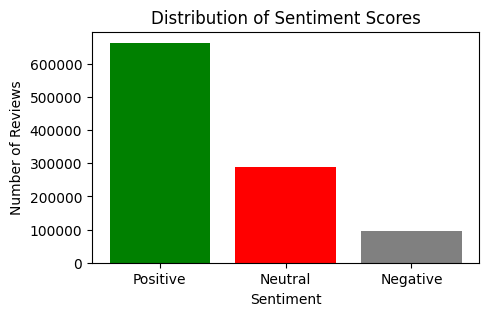

In [59]:
# Plotting the distribution of sentiment scores
plt.figure(figsize=(5, 3))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'gray'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiment Scores')
plt.show()

In [60]:
#pip install plotly

In [61]:
import plotly.express as px
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_review_text['cleaned_review'])

In [63]:
word_frequencies = Counter(vectorizer.get_feature_names_out())

In [64]:
word_frequencies_df = pd.DataFrame.from_dict(word_frequencies, orient='index', columns=['frequency'])
word_frequencies_df = word_frequencies_df.sort_values(by='frequency', ascending=False)

#### Frequency Vs Words

In [65]:
top_n = 20
top_words = word_frequencies_df.head(top_n)

fig = px.bar(top_words, x=top_words.index, y='frequency', labels={'x': 'Words', 'frequency': 'Frequency'})
fig.update_layout(title=f'Top {top_n} Most Frequent Words',
                  xaxis_title='Words',
                  yaxis_title='Frequency')
fig.show()

### Count Vs Categories

In [66]:
category_counts = df_review_text['category'].value_counts()
category_counts_df = pd.DataFrame({'Category': category_counts.index, 'Count': category_counts.values})

custom_color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

fig = px.bar(category_counts_df, x='Category', y='Count', labels={'Category': 'Category', 'Count': 'Count'})
fig.update_layout(title='Distribution of Categories',
                  xaxis_title='Category',
                  yaxis_title='Count')
fig.update_traces(marker_color=custom_color_palette)
fig.show()

### Statistics

In [67]:
numeric_summary = df_review_text.describe()
category_counts = df_review_text['category'].value_counts()

In [68]:
mean_sentiment_by_category = df_review_text.groupby('category')['sentiment_score'].mean()
median_sentiment_by_category = df_review_text.groupby('category')['sentiment_score'].median()

In [69]:
correlation_matrix = df_review_text.corr()

<ipython-input-69-5c84d5612712>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [70]:
sentiment_category_cross_tab = pd.crosstab(df_review_text['sentiment'], df_review_text['category'])


In [71]:
sentiment_value_counts = df_review_text['sentiment'].value_counts()
category_value_counts = df_review_text['category'].value_counts()

In [72]:
print(numeric_summary)
print(category_counts)

       sentiment_score
count     1.046804e+06
mean      3.727771e-01
std       4.281931e-01
min      -9.985000e-01
25%       0.000000e+00
50%       4.404000e-01
75%       7.430000e-01
max       9.999000e-01
General    782626
Leads      168344
Care        95834
Name: category, dtype: int64


In [73]:
print(mean_sentiment_by_category)
print(median_sentiment_by_category)

category
Care       0.415964
General    0.327960
Leads      0.556544
Name: sentiment_score, dtype: float64
category
Care       0.6423
General    0.3612
Leads      0.6908
Name: sentiment_score, dtype: float64


In [74]:
print(sentiment_value_counts)
print(category_value_counts)

Positive    663824
Neutral     288011
Negative     94969
Name: sentiment, dtype: int64
General    782626
Leads      168344
Care        95834
Name: category, dtype: int64


In [75]:
print(sentiment_category_cross_tab)

category    Care  General   Leads
sentiment                        
Negative   22803    55507   16659
Neutral     3363   272741   11907
Positive   69668   454378  139778


### Neural Network - Sentiment

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

In [77]:
X = df_review_text['cleaned_review']
y_sentiment = df_review_text['sentiment']

In [78]:
y_sentiment_binary = (y_sentiment == 'Positive').astype(int)

In [79]:
X_train, X_test, y_train_sentiment, y_test_sentiment = train_test_split(
    X, y_sentiment_binary, test_size=0.2, random_state=42
)

In [80]:
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

In [81]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [82]:
max_sequence_length = 200
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [83]:
# Build the neural network model
embedding_dim = 100

In [84]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification for sentiment

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [85]:
# Train the model
batch_size = 32
epochs = 2

model.fit(X_train_padded, y_train_sentiment, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/2
23554/23554 [==============================] - 1203s 51ms/step - loss: 0.1167 - accuracy: 0.9566 - val_loss: 0.0861 - val_accuracy: 0.9679
Epoch 2/2
23554/23554 [==============================] - 1202s 51ms/step - loss: 0.0655 - accuracy: 0.9769 - val_loss: 0.0858 - val_accuracy: 0.9708


In [86]:
import pickle

In [87]:
# Save the trained tokenizer
with open('tokenizer.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)

In [88]:
from google.colab import drive
drive.mount('/content/drive')

model.save('/content/drive/MyDrive/trained_model')

print("Model saved successfully.")

Model saved successfully.


In [89]:
df_review_text.head(10)

,reviewText,cleaned_review,sentiment_score,sentiment,category
0,This was the first time I read Garcia-Aguilera...,first time read garciaaguilera came upon name ...,0.9764,Positive,General
1,"As with all of Ms. Garcia-Aguilera's books, I ...",ms garciaaguileras books think must read impos...,0.8807,Positive,General
2,I've not read any of Ms Aguilera's works befor...,ive read ms aguileras works finished one hot s...,0.0772,Positive,General
3,This romance novel is right up there with the ...,romance novel right rest amazing mystery novel...,0.9858,Positive,General
4,Carolina Garcia Aguilera has done it again. S...,carolina garcia aguilera done shes written ano...,0.4927,Positive,General
5,"Not only can she write mysteries,but she sure ...",write mysteriesbut sure write love story one h...,0.7579,Positive,General
6,Once again Garcia-Aguilera has written a book ...,garciaaguilera written book cant put read love...,0.9304,Positive,Care
7,The timing is just right for a good book. Actu...,timing right good book actually long overdue t...,0.8324,Positive,Care
8,Engaging. Dark. Reading the book you could alm...,engaging dark reading book could almost feel t...,0.3306,Positive,Care
9,Set amid the backdrop of New York City's imper...,set amid backdrop new york citys impervious hi...,0.9774,Positive,General


### Neural Network - Catagory

In [90]:
X = df_review_text['cleaned_review']
y_category = df_review_text['category']

In [91]:
import numpy as np

In [92]:
category_labels = np.unique(y_category)
category_label_to_index = {label: index for index, label in enumerate(category_labels)}
y_category_index = np.array([category_label_to_index[label] for label in y_category])

In [93]:
X_train, X_test, y_train_category, y_test_category = train_test_split(
    X, y_category_index, test_size=0.2, random_state=42
)

In [94]:
# Tokenization and padding
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 200
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [95]:
# Build the neural network model
embedding_dim = 100

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(category_labels), activation='softmax'))  # Multi-class classification for category

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [96]:
# Train the model
batch_size = 32
epochs = 2

model.fit(X_train_padded, y_train_category, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/2
23554/23554 [==============================] - 1207s 51ms/step - loss: 0.0360 - accuracy: 0.9900 - val_loss: 0.0200 - val_accuracy: 0.9959
Epoch 2/2
23554/23554 [==============================] - 1203s 51ms/step - loss: 0.0148 - accuracy: 0.9974 - val_loss: 0.0223 - val_accuracy: 0.9960


In [97]:
from google.colab import drive
drive.mount('/content/drive')

model.save('/content/drive/MyDrive/trained_model_category')

print("Model saved successfully.")

Model saved successfully.


In [98]:
pip install seaborn

### Sentiment Vs Category

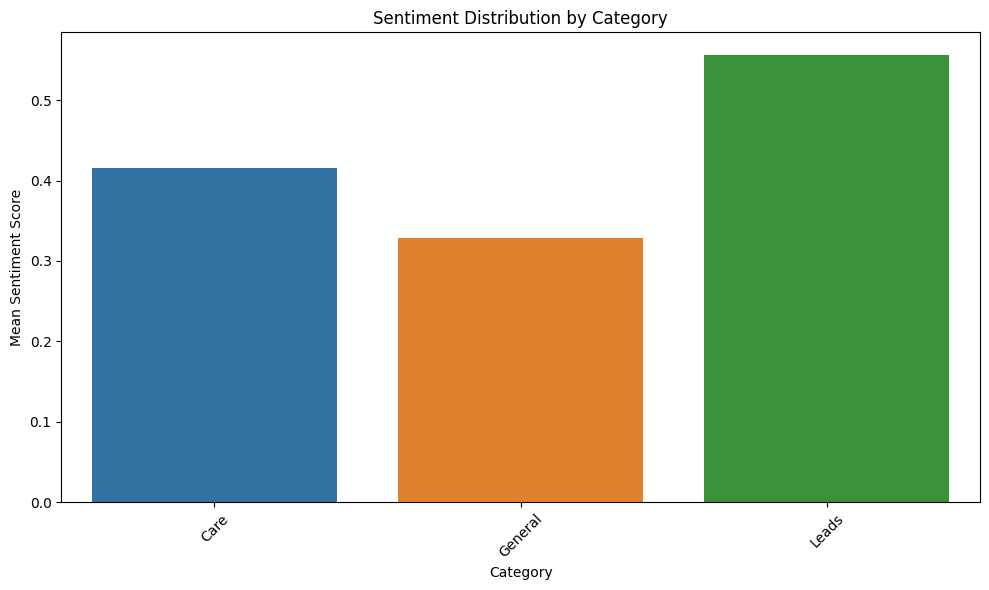

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
category_sentiment_mean = df_review_text.groupby('category')['sentiment_score'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_sentiment_mean.index, y=category_sentiment_mean.values)
plt.xlabel('Category')
plt.ylabel('Mean Sentiment Score')
plt.title('Sentiment Distribution by Category')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

#### Top 20 Word Frequencies in Positive and Negative Reviews

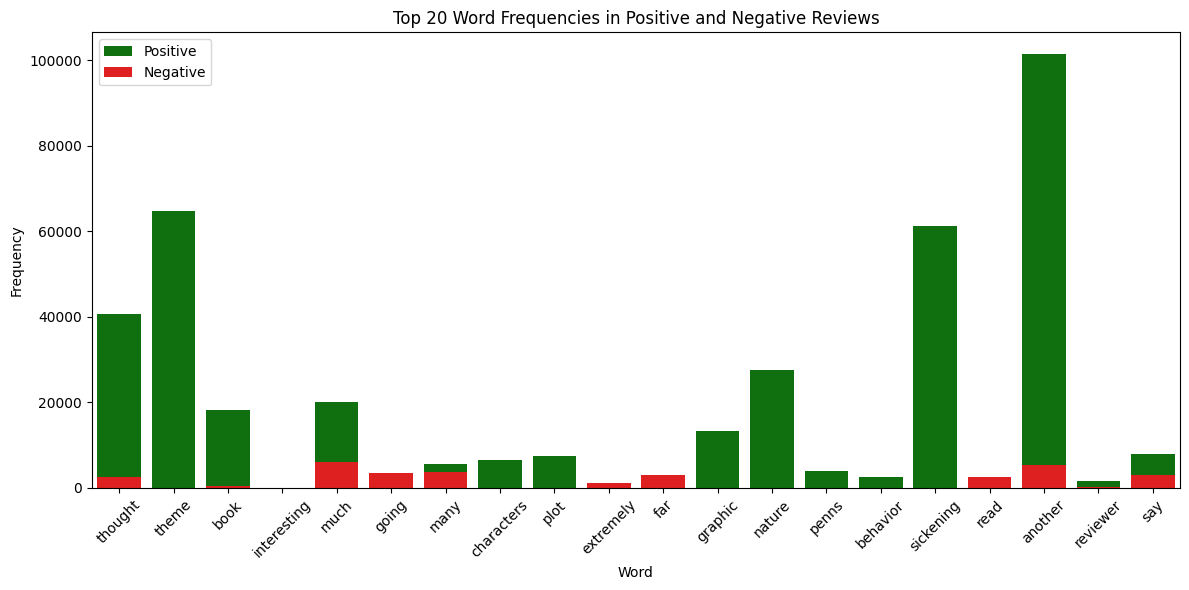

In [100]:
from collections import Counter

positive_reviews = " ".join(df_review_text[df_review_text['sentiment'] == 'Positive']['cleaned_review'])
negative_reviews = " ".join(df_review_text[df_review_text['sentiment'] == 'Negative']['cleaned_review'])

positive_words = positive_reviews.split()
negative_words = negative_reviews.split()
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(positive_word_counts.keys())[:20], y=list(positive_word_counts.values())[:20], color='green', label='Positive')
sns.barplot(x=list(negative_word_counts.keys())[:20], y=list(negative_word_counts.values())[:20], color='red', label='Negative')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Word Frequencies in Positive and Negative Reviews')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

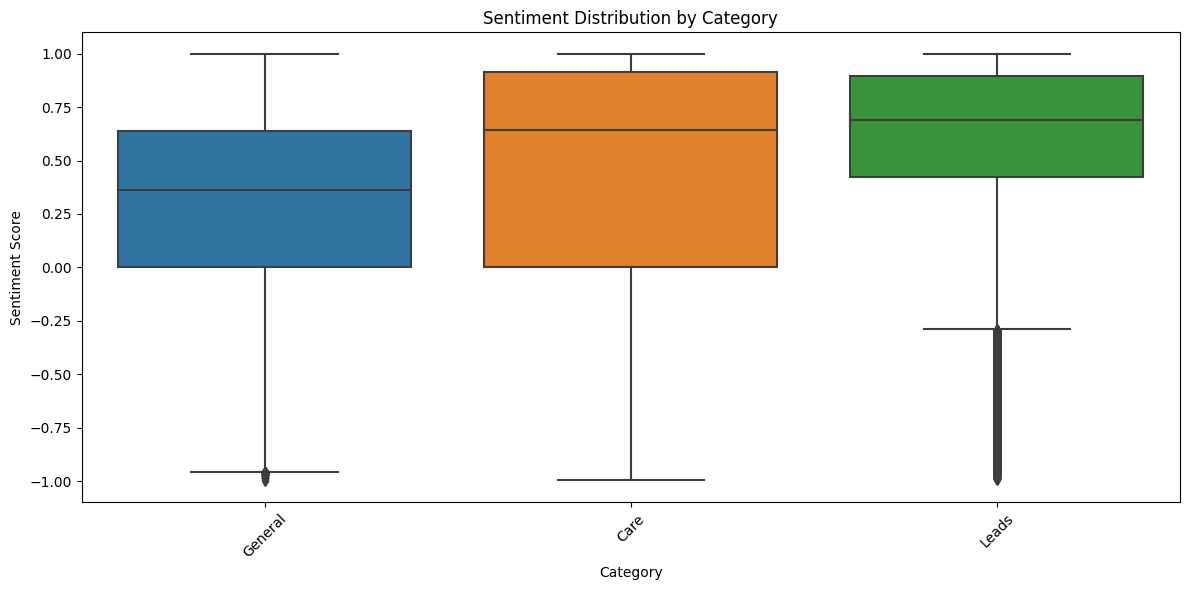

In [101]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='sentiment_score', data=df_review_text)
plt.xlabel('Category')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Distribution by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Sentiment Distribution by Category

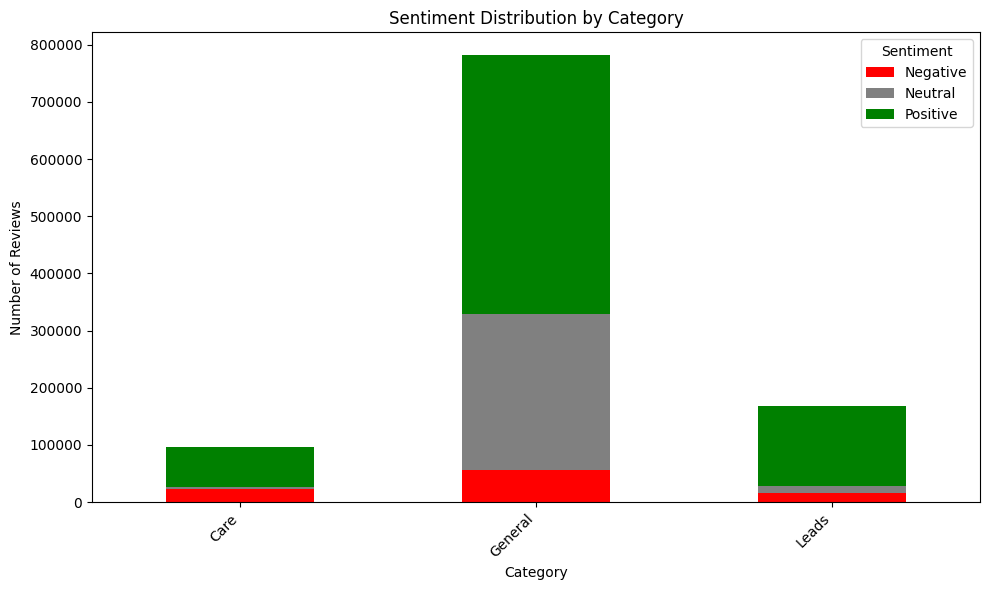

In [102]:
import seaborn as sns
sentiment_by_category = df_review_text.groupby(['category', 'sentiment']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sentiment_by_category.plot(kind='bar', stacked=True, color=['red', 'gray', 'green'], ax=plt.gca())
plt.xlabel('Category')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Distribution by Category')
plt.legend(title='Sentiment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Objective 1 - Completed

- Sentiment Analysis: We assessed sentiments in reviews, categorizing them as positive, negative, or neutral. This step uncovered users' feelings toward the brand, vital for understanding experiences.

- Categorization: Reviews were organized into 'Care', 'Leads', and 'General' categories. This systematic approach enabled differentiation of user experiences based on review context.

- Sentiment Distribution: Visualizing sentiment distribution per category illuminated diverse user sentiments. Insights into emotional responses across review categories were revealed.

- Sentiment Distribution Analysis: Box plots deepened our understanding of sentiment score distribution, highlighting trends and outliers within categories.

- Qualitative Analysis: A manual subset review unveiled nuanced insights, emotions, and patterns beyond automated sentiment analysis. (Yet to Complete)

### Topic modeling

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim import matutils, models
import scipy.sparse

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [105]:
subset_size = 2000
subset_df = df_review_text.sample(n=subset_size, random_state=42)

In [106]:
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(subset_df['cleaned_review'])

In [107]:
corpus = matutils.Sparse2Corpus(tfidf_matrix.transpose())

In [108]:
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

In [109]:
# Perform LDA
num_topics = 7
passes = 5
lda = models.LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, passes=passes, workers=4)

In [110]:
for topic_num, words in lda.print_topics():
    print(f"Topic #{topic_num + 1}: {words}\n")

Topic #1: 0.010*"fit" + 0.009*"im" + 0.008*"great" + 0.008*"sound" + 0.007*"new" + 0.007*"bag" + 0.006*"mm" + 0.006*"use" + 0.006*"batteries" + 0.006*"love"

Topic #2: 0.058*"great" + 0.046*"good" + 0.026*"price" + 0.017*"excellent" + 0.016*"work" + 0.016*"value" + 0.016*"lens" + 0.012*"speakers" + 0.010*"headphones" + 0.010*"sound"

Topic #3: 0.028*"great" + 0.027*"works" + 0.013*"like" + 0.012*"needed" + 0.011*"cable" + 0.010*"expected" + 0.009*"worked" + 0.008*"better" + 0.007*"battery" + 0.007*"ipod"

Topic #4: 0.198*"stars" + 0.021*"customer" + 0.019*"amazon" + 0.016*"ok" + 0.015*"item" + 0.013*"star" + 0.010*"junk" + 0.009*"buy" + 0.009*"way" + 0.007*"piece"

Topic #5: 0.016*"radio" + 0.015*"nice" + 0.014*"great" + 0.013*"job" + 0.011*"works" + 0.010*"good" + 0.009*"using" + 0.008*"year" + 0.008*"perfectly" + 0.008*"pay"

Topic #6: 0.047*"works" + 0.022*"perfect" + 0.013*"great" + 0.012*"described" + 0.012*"best" + 0.010*"good" + 0.010*"quality" + 0.010*"product" + 0.009*"excelle

### Emotion Analysis

In [111]:
#pip install textblob

In [112]:
from textblob import TextBlob

In [113]:
custom_emotions = ['Joy', 'Sadness', 'Anger', 'Surprise', 'Fear', 'Disgust', 'Neutral']

In [114]:
def get_emotion(sentiment_score):
    if sentiment_score > 0.3:
        return 'Joy'
    elif sentiment_score < -0.3:
        return 'Sadness'
    elif sentiment_score > 0:
        return 'Surprise'
    elif sentiment_score < 0:
        return 'Anger'
    else:
        return 'Neutral'

if sentiment_score > 0.3:: If the sentiment score is greater than 0.3, the function returns 'Joy'. This means that if the sentiment of a review is very positive (above 0.3), the emotion associated with it is considered to be joy.

if sentiment_score < -0.3:: If the sentiment score is less than -0.3, the function returns 'Sadness'. This means that if the sentiment of a review is very negative (below -0.3), the emotion associated with it is considered to be sadness.

if sentiment_score > 0:: If the sentiment score is greater than 0 (but not as high as 0.3), the function returns 'Surprise'. This means that moderately positive sentiments are associated with surprise.

if sentiment_score < 0:: If the sentiment score is less than 0 (but not as low as -0.3), the function returns 'Anger'. This means that moderately negative sentiments are associated with anger.

else:: If the sentiment score is exactly 0, the function returns 'Neutral'. This means that reviews with a sentiment score close to 0 are considered neutral in emotion.

In [115]:
df_review_text['emotion'] = df_review_text['sentiment_score'].apply(get_emotion)

In [116]:
print(df_review_text[['cleaned_review', 'sentiment', 'emotion', 'category']])

                                            cleaned_review sentiment  \
0        first time read garciaaguilera came upon name ...  Positive   
1        ms garciaaguileras books think must read impos...  Positive   
2        ive read ms aguileras works finished one hot s...  Positive   
3        romance novel right rest amazing mystery novel...  Positive   
4        carolina garcia aguilera done shes written ano...  Positive   
...                                                    ...       ...   
1048570          mm hiresolution pcs lens filter kit black   Neutral   
1048571                            low cost filter kit job  Negative   
1048572                                          filer kit   Neutral   
1048573                                     best bang buck  Positive   
1048574                                     great exercise  Positive   

          emotion category  
0             Joy  General  
1             Joy  General  
2        Surprise  General  
3             Joy  

In [117]:
df_review_text.head(10)

,reviewText,cleaned_review,sentiment_score,sentiment,category,emotion
0,This was the first time I read Garcia-Aguilera...,first time read garciaaguilera came upon name ...,0.9764,Positive,General,Joy
1,"As with all of Ms. Garcia-Aguilera's books, I ...",ms garciaaguileras books think must read impos...,0.8807,Positive,General,Joy
2,I've not read any of Ms Aguilera's works befor...,ive read ms aguileras works finished one hot s...,0.0772,Positive,General,Surprise
3,This romance novel is right up there with the ...,romance novel right rest amazing mystery novel...,0.9858,Positive,General,Joy
4,Carolina Garcia Aguilera has done it again. S...,carolina garcia aguilera done shes written ano...,0.4927,Positive,General,Joy
5,"Not only can she write mysteries,but she sure ...",write mysteriesbut sure write love story one h...,0.7579,Positive,General,Joy
6,Once again Garcia-Aguilera has written a book ...,garciaaguilera written book cant put read love...,0.9304,Positive,Care,Joy
7,The timing is just right for a good book. Actu...,timing right good book actually long overdue t...,0.8324,Positive,Care,Joy
8,Engaging. Dark. Reading the book you could alm...,engaging dark reading book could almost feel t...,0.3306,Positive,Care,Joy
9,Set amid the backdrop of New York City's imper...,set amid backdrop new york citys impervious hi...,0.9774,Positive,General,Joy


In [118]:
emotion_counts = df_review_text['emotion'].value_counts()

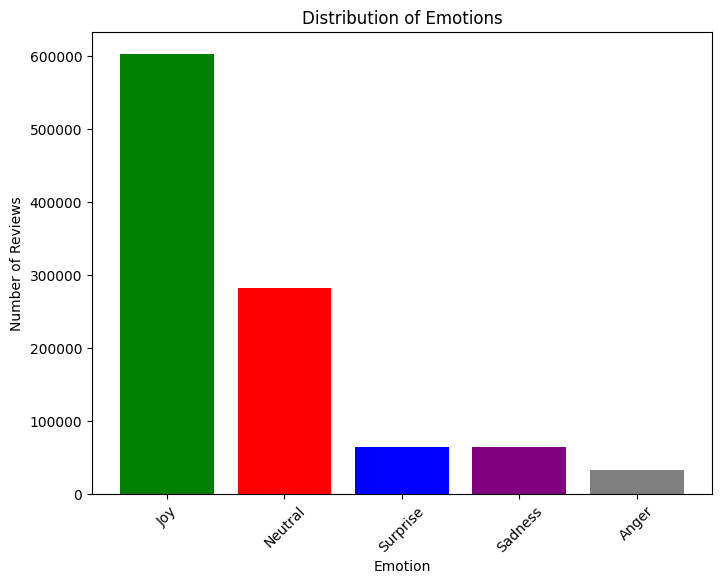

In [119]:
plt.figure(figsize=(8, 6))
plt.bar(emotion_counts.index, emotion_counts.values, color=['green', 'red', 'blue', 'purple', 'gray'])
plt.xlabel('Emotion')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Emotions')
plt.xticks(rotation=45)
plt.show()

In [120]:
print("Emotion Counts:")
print(emotion_counts)

Emotion Counts:
Joy         602326
Neutral     281434
Surprise     64975
Sadness      64955
Anger        33114
Name: emotion, dtype: int64


#### Heat Map - Emotion Vs Sentiment

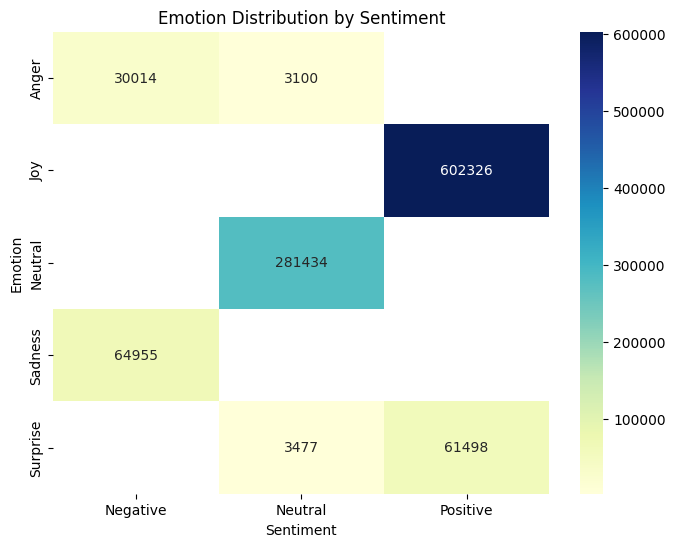

In [121]:
emotion_sentiment_pivot = df_review_text.pivot_table(index='emotion', columns='sentiment', values='cleaned_review', aggfunc='count')
plt.figure(figsize=(8, 6))
sns.heatmap(emotion_sentiment_pivot, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Emotion Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Emotion')
plt.show()

#### Comparison of Sentiment, Category, and Emotion

In [122]:
import plotly.express as px

grouped_df = df_review_text.groupby(['sentiment', 'category', 'emotion']).size().reset_index(name='count')

fig = px.bar(grouped_df, x='sentiment', y='count', color='emotion', facet_col='category',
             category_orders={'sentiment': ['Positive', 'Neutral', 'Negative']},
             labels={'sentiment': 'Sentiment', 'count': 'Count'},
             title='Comparison of Sentiment, Category, and Emotion')

fig.show()

#### Objective 2: Understanding the impact of data analytics techniques on social media presence and brand recognition can be achieved through expert interviews.

#### Objective 3: Identifying the most effective data analytics techniques for enhancing brand recognition on social media can be accomplished through comprehensive research and analysis of existing literature, case studies, and industry reports.

## Time Series Analysis

In [123]:
subset_df_review_text = df_review_text.head(5000)
subset_df = df.head(5000)

merged_subset_df = subset_df_review_text.merge(subset_df[['reviewText', 'reviewTime']], on='reviewText', how='left')

print(merged_subset_df[['cleaned_review', 'sentiment', 'emotion', 'category', 'reviewTime']])

                                          cleaned_review sentiment   emotion  \
0      first time read garciaaguilera came upon name ...  Positive       Joy   
1      ms garciaaguileras books think must read impos...  Positive       Joy   
2      ive read ms aguileras works finished one hot s...  Positive  Surprise   
3      romance novel right rest amazing mystery novel...  Positive       Joy   
4      carolina garcia aguilera done shes written ano...  Positive       Joy   
...                                                  ...       ...       ...   
74081                good reader needs good light source  Positive       Joy   
74082  nook simple touch great ereader basic reading ...  Positive       Joy   
74083                                         reviewtext   Neutral   Neutral   
74084                                         reviewtext   Neutral   Neutral   
74085                                         reviewtext   Neutral   Neutral   

      category   reviewTime  
0      Ge

In [124]:
merged_subset_df.head(10)

,reviewText,cleaned_review,sentiment_score,sentiment,category,emotion,reviewTime
0,This was the first time I read Garcia-Aguilera...,first time read garciaaguilera came upon name ...,0.9764,Positive,General,Joy,"07 17, 2002"
1,"As with all of Ms. Garcia-Aguilera's books, I ...",ms garciaaguileras books think must read impos...,0.8807,Positive,General,Joy,"07 6, 2002"
2,I've not read any of Ms Aguilera's works befor...,ive read ms aguileras works finished one hot s...,0.0772,Positive,General,Surprise,"07 3, 2002"
3,This romance novel is right up there with the ...,romance novel right rest amazing mystery novel...,0.9858,Positive,General,Joy,"06 30, 2002"
4,Carolina Garcia Aguilera has done it again. S...,carolina garcia aguilera done shes written ano...,0.4927,Positive,General,Joy,"06 28, 2002"
5,"Not only can she write mysteries,but she sure ...",write mysteriesbut sure write love story one h...,0.7579,Positive,General,Joy,"06 25, 2002"
6,Once again Garcia-Aguilera has written a book ...,garciaaguilera written book cant put read love...,0.9304,Positive,Care,Joy,"06 22, 2002"
7,The timing is just right for a good book. Actu...,timing right good book actually long overdue t...,0.8324,Positive,Care,Joy,"01 26, 2006"
8,Engaging. Dark. Reading the book you could alm...,engaging dark reading book could almost feel t...,0.3306,Positive,Care,Joy,"01 21, 2006"
9,Set amid the backdrop of New York City's imper...,set amid backdrop new york citys impervious hi...,0.9774,Positive,General,Joy,"01 18, 2006"


In [125]:
merged_subset_df['reviewTime'] = pd.to_datetime(merged_subset_df['reviewTime'], errors='coerce')

In [126]:
merged_subset_df.set_index('reviewTime', inplace=True)

In [127]:
monthly_sentiment_percentage = merged_subset_df.resample('M').apply(lambda x: x['sentiment'].value_counts(normalize=True))

In [128]:
sentiment_mapping = {'Negative': -1, 'Neutral': 0, 'Positive': 1}

In [129]:
merged_subset_df['sentiment_numeric'] = merged_subset_df['sentiment'].map(sentiment_mapping)

In [130]:
monthly_sentiment_mean = merged_subset_df['sentiment_numeric'].resample('M').mean()

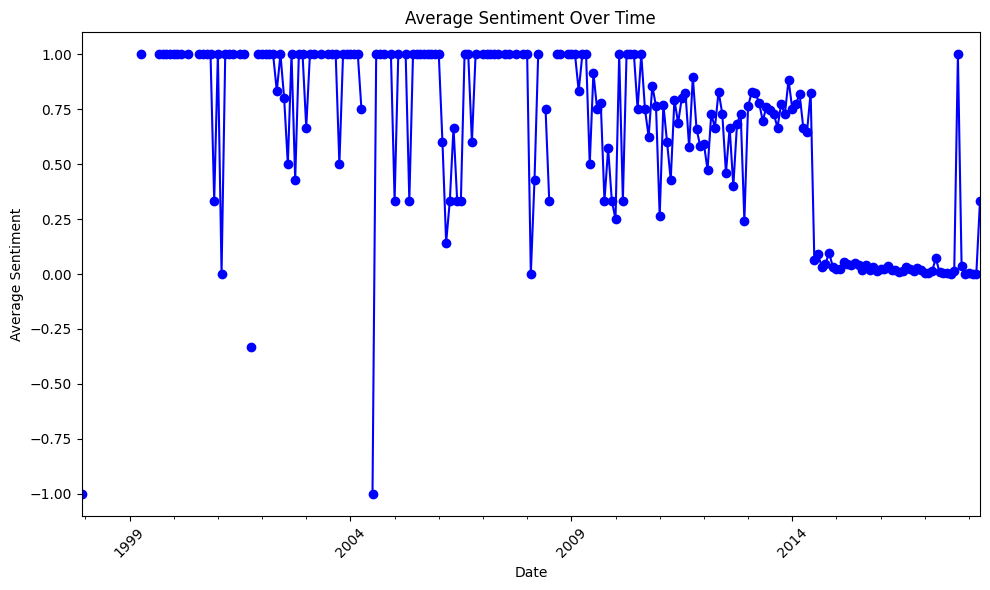

In [131]:
plt.figure(figsize=(10, 6))
monthly_sentiment_mean.plot(kind='line', marker='o', color='b')

plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [132]:
fig = px.line(monthly_sentiment_mean, x=monthly_sentiment_mean.index, y='sentiment_numeric',
              title='Average Sentiment Over Time', labels={'sentiment_numeric': 'Average Sentiment'})

fig.update_xaxes(title_text='Date', tickangle=-45)
fig.update_yaxes(title_text='Average Sentiment')

fig.show()

In [133]:
pip install --upgrade typing-extensions

In [134]:
pip install --upgrade pydantic spacy

### Named Entity Recognition (NER)

In [135]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
merged_subset_df.head(10)

In [ ]:
# perform NER
for index, row in merged_subset_df.iterrows():
    text = row['cleaned_review']
    doc = nlp(text)
    for ent in doc.ents:
        print(ent.text, ent.label_)

## Validation

In [136]:
import random

In [137]:
unique_cleaned_reviews = merged_subset_df['cleaned_review'].unique()

In [138]:
random_cleaned_reviews = random.sample(list(unique_cleaned_reviews), k=min(100, len(unique_cleaned_reviews)))

In [139]:
random_subset_df = pd.DataFrame({'cleaned_review': random_cleaned_reviews})

In [140]:
random_subset_df['UMID'] = [f"AE_{i}" for i in range(1, 101)]

In [141]:
random_subset_df.head(10)

,cleaned_review,UMID
0,kirk martin managed capture long romantic week...,AE_1
1,needed television hanger good extension job in...,AE_2
2,satisfied bracket,AE_3
3,works well recommend one nook color,AE_4
4,cord helps two locations plug nook charge sugg...,AE_5
5,easy mount moves nice tv would order needed an...,AE_6
6,best deal,AE_7
7,sure well spent,AE_8
8,product good described vizio tv somehow wall m...,AE_9
9,really nice,AE_10


In [142]:
random_subset_df = random_subset_df[['UMID', 'cleaned_review']]
print(random_subset_df)

      UMID                                     cleaned_review
0     AE_1  kirk martin managed capture long romantic week...
1     AE_2  needed television hanger good extension job in...
2     AE_3                                  satisfied bracket
3     AE_4                works well recommend one nook color
4     AE_5  cord helps two locations plug nook charge sugg...
..     ...                                                ...
95   AE_96  swing arm tv wall mount perfect situation boug...
96   AE_97                                             worked
97   AE_98                               good product rma two
98   AE_99              product works well meets expectations
99  AE_100                                            get pay

[100 rows x 2 columns]


In [143]:
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [144]:
with open('tokenizer.pkl', 'rb') as tokenizer_file:
    tokenizer = pickle.load(tokenizer_file)

### Taking Sentiment Prediction  - From Neural Network

In [145]:
from google.colab import drive
from keras.models import load_model

drive.mount('/content/drive')

model = load_model('/content/drive/MyDrive/trained_model')

print("Model loaded successfully.")

In [146]:
max_sequence_length = 200
review_sequences = tokenizer.texts_to_sequences(random_subset_df['cleaned_review'])
review_padded = pad_sequences(review_sequences, maxlen=max_sequence_length)

In [147]:
# Predict sentiment
predictions = model.predict(review_padded)
sentiment_labels = ['Positive' if pred > 0.5 else 'Negative' for pred in predictions]

4/4 [==============================] - 0s 13ms/step


In [148]:
random_subset_df['sentiment'] = sentiment_labels

In [149]:
print(random_subset_df)

      UMID                                     cleaned_review sentiment
0     AE_1  kirk martin managed capture long romantic week...  Positive
1     AE_2  needed television hanger good extension job in...  Positive
2     AE_3                                  satisfied bracket  Positive
3     AE_4                works well recommend one nook color  Positive
4     AE_5  cord helps two locations plug nook charge sugg...  Positive
..     ...                                                ...       ...
95   AE_96  swing arm tv wall mount perfect situation boug...  Positive
96   AE_97                                             worked  Negative
97   AE_98                               good product rma two  Positive
98   AE_99              product works well meets expectations  Positive
99  AE_100                                            get pay  Negative

[100 rows x 3 columns]


### Taking Category Prediction  - From Neural Network

In [150]:
from google.colab import drive
from keras.models import load_model

drive.mount('/content/drive')

model_path = '/content/drive/MyDrive/path_to_your_model/trained_model_category'
category_model = load_model(model_path)

print("Model loaded successfully.")

In [151]:
X_random = random_subset_df['cleaned_review']

In [152]:
X_random_seq = tokenizer.texts_to_sequences(X_random)
X_random_padded = pad_sequences(X_random_seq, maxlen=max_sequence_length)

In [153]:
# Predict categories
y_pred_category_index = category_model.predict(X_random_padded)
y_pred_category_label = [category_labels[np.argmax(pred)] for pred in y_pred_category_index]

4/4 [==============================] - 0s 8ms/step


In [154]:
random_subset_df['predicted_category'] = y_pred_category_label

In [155]:
random_subset_df.to_excel('random_subset_predictions.xlsx', index=False)
print("Predictions saved successfully.")

Predictions saved successfully.


In [156]:
random_subset_df.head(10)

,UMID,cleaned_review,sentiment,predicted_category
0,AE_1,kirk martin managed capture long romantic week...,Positive,General
1,AE_2,needed television hanger good extension job in...,Positive,General
2,AE_3,satisfied bracket,Positive,General
3,AE_4,works well recommend one nook color,Positive,General
4,AE_5,cord helps two locations plug nook charge sugg...,Positive,General
5,AE_6,easy mount moves nice tv would order needed an...,Positive,General
6,AE_7,best deal,Positive,General
7,AE_8,sure well spent,Positive,General
8,AE_9,product good described vizio tv somehow wall m...,Positive,Leads
9,AE_10,really nice,Positive,General


In [157]:
random_subset_df.to_excel('random_subset.xlsx', index=False)